In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
os.listdir('./전처리/별첨/')

['경남_의료기관_수.csv',
 '경남공공보건기관.csv',
 '경남공공보건기관_병상.csv',
 '경남공공의료기관.csv',
 '경남공공의료기관_2.csv',
 '경남공공의료기관_병상.csv',
 '경남민간병원.csv',
 '경남민간의료기관_병상.csv',
 '경남의료기관_병상수.csv',
 '김해시_진료과.csv',
 '김해시_진료과_요약.csv',
 '응급시설.csv',
 '의료기관종사_의료인력_20221123145731.csv',
 '최종']

In [4]:
보건 = pd.read_csv('./전처리/별첨/경남공공보건기관.csv', encoding='cp949')

In [5]:
보건_요약 = 보건[['종별코드명','시군구코드명', '읍면동']]

In [6]:
보건_요약 = 보건_요약[보건_요약['시군구코드명']=='김해시']

In [7]:
보건_요약.sort_values('종별코드명', inplace=True)

In [8]:
보건_요약.reset_index(drop=True, inplace=True)

In [9]:
보건_요약

종별코드명 시군구코드명  읍면동
0    보건소    김해시  NaN
1   보건지소    김해시  부곡동
2   보건지소    김해시  NaN
3   보건지소    김해시  상동면
4   보건지소    김해시  생림면
5   보건지소    김해시  NaN
6   보건지소    김해시  진례면
7   보건지소    김해시  진영읍
8   보건지소    김해시  한림면
9  보건진료소    김해시  생림면

In [10]:
보건_요약['읍면동'][5] = '삼안동'

In [11]:
보건_요약

종별코드명 시군구코드명  읍면동
0    보건소    김해시  NaN
1   보건지소    김해시  부곡동
2   보건지소    김해시  NaN
3   보건지소    김해시  상동면
4   보건지소    김해시  생림면
5   보건지소    김해시  삼안동
6   보건지소    김해시  진례면
7   보건지소    김해시  진영읍
8   보건지소    김해시  한림면
9  보건진료소    김해시  생림면

In [12]:
공공보건 = pd.DataFrame(보건_요약.groupby('읍면동')['종별코드명'].value_counts())

In [13]:
공공보건

종별코드명
읍면동 종별코드명       
부곡동 보건지소       1
삼안동 보건지소       1
상동면 보건지소       1
생림면 보건지소       1
    보건진료소      1
진례면 보건지소       1
진영읍 보건지소       1
한림면 보건지소       1

In [14]:
공공보건.columns

Index(['종별코드명'], dtype='object')

In [15]:
columns = ['행정동','보건소','보건지소', '보건진료소']

In [16]:
df = pd.DataFrame(data = [
                   ['진영읍',0,1,0],
                   ['진례면',0,1,0],
                   ['한림면',0,1,0],
                   ['생림면',0,1,1],
                   ['상동면',0,1,0],
                   ['대동면',0,1,0],
                   ['내외동',1,0,0],
                   ['삼안동',0,1,0],
                   ['장유1동',0,1,0]
                  ], columns=columns)

In [17]:
df

행정동  보건소  보건지소  보건진료소
0   진영읍    0     1      0
1   진례면    0     1      0
2   한림면    0     1      0
3   생림면    0     1      1
4   상동면    0     1      0
5   대동면    0     1      0
6   내외동    1     0      0
7   삼안동    0     1      0
8  장유1동    0     1      0

In [18]:
df = df[::-1]

In [19]:
df.set_index('행정동', inplace=True)

In [20]:
df

보건소  보건지소  보건진료소
행정동                   
장유1동    0     1      0
삼안동     0     1      0
내외동     1     0      0
대동면     0     1      0
상동면     0     1      0
생림면     0     1      1
한림면     0     1      0
진례면     0     1      0
진영읍     0     1      0

In [21]:
df['총합계'] = df['보건소'] + df['보건지소'] +df['보건진료소'] 

In [22]:
df

보건소  보건지소  보건진료소  총합계
행정동                        
장유1동    0     1      0    1
삼안동     0     1      0    1
내외동     1     0      0    1
대동면     0     1      0    1
상동면     0     1      0    1
생림면     0     1      1    2
한림면     0     1      0    1
진례면     0     1      0    1
진영읍     0     1      0    1

In [23]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = df['보건소']
z = df['보건지소']
a = df['보건진료소']

data = [x, z, a]
y_array = df.index
color = ['']

for i in range(0, 3):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        alpha=0.65)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = df['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.01, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('공공보건기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정동별', labelpad=20, size=20, weight ='bold')
plt.legend(df.columns, loc = (0.83, 0.7) )
plt.xlim(0,3,1)
plt.show()

In [24]:
df = pd.read_csv('./전처리/의료기관종사_의료인력_20221215181830.csv', encoding='cp949', header=1)

In [25]:
df

행정구역(시군)별     합계  상근의사 비상근의사  치과의사   한의사    약사 조산사    간호사  간호조무사  의료기사  \
0         합계  49204  5619     -  1406  1291  2192   5  14576  13855  9925   
1        창원시  17063  1957     -   443   424   728   1   5359   4195  3845   
2        진주시   6739   884     -   151   135   270   -   2463   1443  1362   
3        통영시   1579   169     -    44    36    84   -    330    556   353   
4        사천시   1356   142     -    39    44    72   -    323    485   246   
5        김해시   7205   693     -   207   191   314   2   1692   2543  1504   
6        밀양시   1218   121     -    38    35    71   2    219    524   199   
7        거제시   2466   233     -    90    61   117   -    746    680   521   
8        양산시   6646   843     -   249   168   263   -   2400   1599  1068   
9        의령군    284    30     -     6    12    16   -     60    108    50   
10       함안군    695    65     -    18    20    34   -    148    267   136   
11       창녕군    922    94     -    19    31    43   -    223    381   123   
12       고성군    544    66     -    15    21    26   -    131    193    85   
13       남해군    339    47     -    12    17    24   -     44    128    63   
14       하동군    420    49     -    16    18    26   -     93    135    82   
15       산청군    241    33     -    10    21    16   -     47     78    33   
16       함양군    307    47     -    14    12    22   -     50     97    64   
17       거창군    752    90     -    20    22    43   -    169    285   120   
18       합천군    428    56     -    15    23    23   -     79    158    71   

    보건의료정보관리사  
0         335  
1         111  
2          31  
3           7  
4           5  
5          59  
6           9  
7          18  
8          56  
9           2  
10          7  
11          8  
12          7  
13          4  
14          1  
15          3  
16          1  
17          3  
18          3

In [26]:
df.drop(0, axis=0, inplace=True)

In [27]:
df.drop(['합계','비상근의사','약사','조산사','보건의료정보관리사'], axis=1, inplace=True)

In [28]:
df['의사'] = df['상근의사'] + df['치과의사'] + df['한의사']

In [29]:
df.drop(['상근의사','치과의사','한의사'], axis=1, inplace=True)

In [30]:
df.set_index('행정구역(시군)별', inplace=True)

In [31]:
df.columns

Index(['간호사', '간호조무사', '의료기사', '의사'], dtype='object')

In [32]:
df = df[['의사','간호사', '간호조무사', '의료기사']]

In [33]:
df['총합계'] = df['의사']+df['간호사']+df['간호조무사']+df['의료기사']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2225984711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총합계'] = df['의사']+df['간호사']+df['간호조무사']+df['의료기사']


In [34]:
df

의사   간호사  간호조무사  의료기사    총합계
행정구역(시군)별                                
창원시        2824  5359   4195  3845  16223
진주시        1170  2463   1443  1362   6438
통영시         249   330    556   353   1488
사천시         225   323    485   246   1279
김해시        1091  1692   2543  1504   6830
밀양시         194   219    524   199   1136
거제시         384   746    680   521   2331
양산시        1260  2400   1599  1068   6327
의령군          48    60    108    50    266
함안군         103   148    267   136    654
창녕군         144   223    381   123    871
고성군         102   131    193    85    511
남해군          76    44    128    63    311
하동군          83    93    135    82    393
산청군          64    47     78    33    222
함양군          73    50     97    64    284
거창군         132   169    285   120    706
합천군          94    79    158    71    402

In [35]:
df = df[::-1]

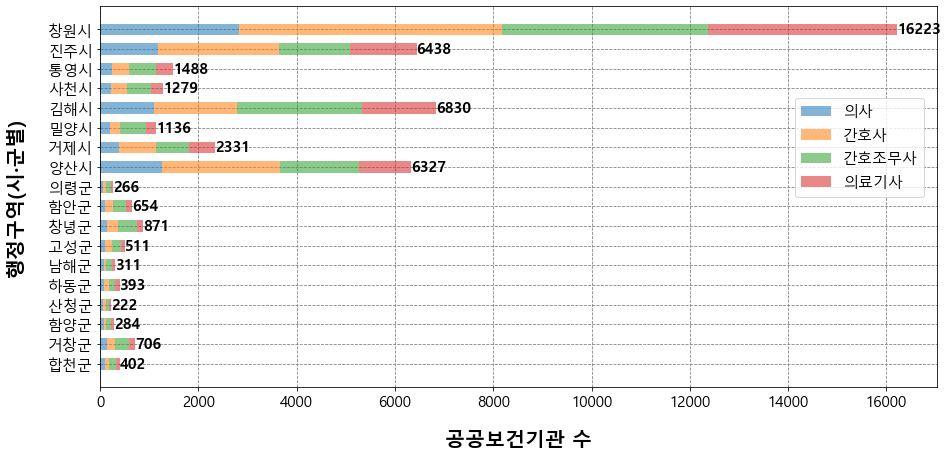

In [36]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x, y, z, a = df['의사'], df['간호사'], df['간호조무사'], df['의료기사']

data = [x, y, z, a]
y_array = df.index

for i in range(0, 4):
    barh = plt.barh( y = y_array, width = data[i],
                     height=0.6, left=np.sum(data[:i], axis=0),
                     alpha=0.55)
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = df['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
plt.xlabel('의료인력 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(df.columns, loc = (0.83, 0.5) )
plt.show()

# 경남 공공보건기관

In [37]:
보건 = pd.read_csv('./전처리/별첨/경남공공보건기관.csv', encoding='cp949')

In [38]:
보건

암호화요양기호           요양기관명  종별코드  \
0    JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...   거제시거제읍산달보건진료소    73   
1    JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...      거제시거제면보건지소    72   
2    JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...       거제시남부보건지소    72   
3    JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   거제시동부면가배보건진료소    73   
4    JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   거제시동부면학동보건진료소    73   
..                                                 ...             ...   ...   
410  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...      청덕면낙진보건진료소    73   
411  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzExIyQxIy...   합천군초계면하남보건진료소    73   
412  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxOTYxIzExIyQxIy...  합천군보건소(초계보건지소)    72   
413  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxMzUxIzExIyQxIy...          합천군보건소    71   
414  JDQ4MTYyMiM4MSMkMSMkNCMkOTIkMzgxNzAyIzIxIyQxIy...   합천군합천읍장인보건진료소    73   

     종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동   우편번호  ... 치과일반의 인원수 치과인턴 인원수  \
0    보건진료소  380000    경남  381000    거제시  거제면  53282  ...         0        0   
1     보건지소  380000    경남  381000    거제시  NaN  53286  ...         0        0   
2     보건지소  380000    경남  381000    거제시  남부면  53333  ...         0        0   
3    보건진료소  380000    경남  381000    거제시  동부면  53330  ...         0        0   
4    보건진료소  380000    경남  381000    거제시  고현동  53332  ...         0        0   
..     ...     ...   ...     ...    ...  ...    ...  ...       ...      ...   
410  보건진료소  380000    경남  380019    합천군  청덕면  50253  ...         0        0   
411  보건진료소  380000    경남  380019    합천군  초계면  50245  ...         0        0   
412   보건지소  380000    경남  380019    합천군  초계면  50246  ...         0        0   
413    보건소  380000    경남  380019    합천군  NaN  50232  ...         1        0   
414  보건진료소  380000    경남  380019    합천군  합천읍  50228  ...         0        0   

    치과레지던트 인원수  치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  한방레지던트 인원수  한방전문의 인원수  \
0            0          0          0         0           0          0   
1            0          0          0         0           0          0   
2            0          0          1         0           0          0   
3            0          0          0         0           0          0   
4            0          0          0         0           0          0   
..         ...        ...        ...       ...         ...        ...   
410          0          0          0         0           0          0   
411          0          0          0         0           0          0   
412          0          1          1         0           0          0   
413          0          1          0         0           0          0   
414          0          0          0         0           0          0   

            x좌표        y좌표  
0    128.532252  34.815429  
1    128.591002  34.847678  
2    128.607743  34.730713  
3    128.569224  34.785001  
4    128.640112  34.776775  
..          ...        ...  
410  128.358608  35.523154  
411  128.250947  35.533999  
412  128.268063  35.557394  
413  128.156845  35.567905  
414  128.116661  35.611671  

[415 rows x 28 columns]

In [39]:
보건.columns

Index(['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명',
       '읍면동', '우편번호', '주소', '전화번호', '개설일자', '총의사수', '의과일반의 인원수', '의과인턴 인원수',
       '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수', '치과레지던트 인원수',
       '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수', '한방전문의 인원수', 'x좌표',
       'y좌표'],
      dtype='object')

In [40]:
보건_요약 = 보건[['종별코드명','시군구코드명']]

In [41]:
보건_요약

종별코드명 시군구코드명
0    보건진료소    거제시
1     보건지소    거제시
2     보건지소    거제시
3    보건진료소    거제시
4    보건진료소    거제시
..     ...    ...
410  보건진료소    합천군
411  보건진료소    합천군
412   보건지소    합천군
413    보건소    합천군
414  보건진료소    합천군

[415 rows x 2 columns]

In [42]:
보건_요약.value_counts('시군구코드명')

시군구코드명
창녕군        33
합천군        32
하동군        31
거창군        30
고성군        26
진주시        26
남해군        25
밀양시        25
산청군        25
거제시        23
의령군        22
통영시        22
함양군        22
사천시        20
함안군        16
김해시        10
양산시         9
창원마산합포구     8
창원의창구       5
창원마산회원구     2
창원진해구       2
창원성산구       1
dtype: int64

In [43]:
for n in range(len(보건_요약)):
    if ((보건_요약['시군구코드명'][n] == '창원마산합포구') or        
       (보건_요약['시군구코드명'][n] == '창원의창구') or
        (보건_요약['시군구코드명'][n] == '창원마산회원구') or
        (보건_요약['시군구코드명'][n] == '창원진해구') or
        (보건_요약['시군구코드명'][n] == '창원성산구')):
            보건_요약['시군구코드명'][n] = '창원시'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\1633234483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  보건_요약['시군구코드명'][n] = '창원시'


In [44]:
보건_요약.value_counts('시군구코드명')

시군구코드명
창녕군    33
합천군    32
하동군    31
거창군    30
고성군    26
진주시    26
남해군    25
밀양시    25
산청군    25
거제시    23
통영시    22
함양군    22
의령군    22
사천시    20
창원시    18
함안군    16
김해시    10
양산시     9
dtype: int64

In [45]:
공공보건 = pd.DataFrame(보건_요약.groupby('시군구코드명')['종별코드명'].value_counts())

In [46]:
공공보건

종별코드명
시군구코드명 종별코드명       
거제시    보건진료소     12
       보건지소      10
       보건소        1
거창군    보건진료소     18
       보건지소      11
       보건소        1
고성군    보건지소      13
       보건진료소     12
       보건소        1
김해시    보건지소       8
       보건소        1
       보건진료소      1
남해군    보건진료소     15
       보건지소       9
       보건소        1
밀양시    보건진료소     15
       보건지소       9
       보건소        1
사천시    보건진료소     12
       보건지소       7
       보건소        1
산청군    보건진료소     15
       보건지소       9
       보건의료원      1
양산시    보건지소       6
       보건진료소      2
       보건소        1
의령군    보건지소      11
       보건진료소     10
       보건소        1
진주시    보건진료소     13
       보건지소      12
       보건소        1
창녕군    보건진료소     19
       보건지소      13
       보건소        1
창원시    보건지소      10
       보건진료소      5
       보건소        3
통영시    보건진료소     18
       보건지소       3
       보건소        1
하동군    보건진료소     18
       보건지소      12
       보건소        1
함안군    보건진료소      9
       보건지소       6
       보건소        1
함양군    보건진료소     11
       보건지소      10
       보건소        1
합천군    보건지소      16
       보건진료소     15
       보건소        1

In [47]:
#공공보건.to_csv('./전처리/경남보건기관.csv',encoding='cp949')

In [48]:
공공보건 = pd.read_csv('./전처리/경남보건기관.csv',encoding='cp949')

In [49]:
공공보건

행 레이블  거제시  거창군  고성군  김해시  남해군  밀양시  사천시  산청군  양산시  의령군  진주시  창녕군  창원시  \
0    보건소    1    1    1    1    1    1    1    0    1    1    1    1    3   
1  보건의료원    0    0    0    0    0    0    0    1    0    0    0    0    0   
2   보건지소   10   11   13    8    9    9    7    9    6   11   12   13   10   
3  보건진료소   12   18   12    1   15   15   12   15    2   10   13   19    5   
4    총합계   23   30   26   10   25   25   20   25    9   22   26   33   18   

   통영시  하동군  함안군  함양군  합천군  총합계  
0    1    1    1    1    1   19  
1    0    0    0    0    0    1  
2    3   12    6   10   16  175  
3   18   18    9   11   15  220  
4   22   31   16   22   32  415

In [50]:
공공보건 = 공공보건.T

In [51]:
공공보건

0      1     2      3    4
행 레이블  보건소  보건의료원  보건지소  보건진료소  총합계
거제시      1      0    10     12   23
거창군      1      0    11     18   30
고성군      1      0    13     12   26
김해시      1      0     8      1   10
남해군      1      0     9     15   25
밀양시      1      0     9     15   25
사천시      1      0     7     12   20
산청군      0      1     9     15   25
양산시      1      0     6      2    9
의령군      1      0    11     10   22
진주시      1      0    12     13   26
창녕군      1      0    13     19   33
창원시      3      0    10      5   18
통영시      1      0     3     18   22
하동군      1      0    12     18   31
함안군      1      0     6      9   16
함양군      1      0    10     11   22
합천군      1      0    16     15   32
총합계     19      1   175    220  415

In [52]:
공공보건.loc['행 레이블']

0      보건소
1    보건의료원
2     보건지소
3    보건진료소
4      총합계
Name: 행 레이블, dtype: object

In [53]:
공공보건.rename(columns={0:'보건소', 1:'보건의료원', 2:'보건지소', 3:'보건진료소', 4:'총합계'}, inplace=True)

In [54]:
공공보건.drop(['행 레이블', '총합계'], axis=0, inplace=True)

In [55]:
공공보건

보건소 보건의료원 보건지소 보건진료소 총합계
거제시   1     0   10    12  23
거창군   1     0   11    18  30
고성군   1     0   13    12  26
김해시   1     0    8     1  10
남해군   1     0    9    15  25
밀양시   1     0    9    15  25
사천시   1     0    7    12  20
산청군   0     1    9    15  25
양산시   1     0    6     2   9
의령군   1     0   11    10  22
진주시   1     0   12    13  26
창녕군   1     0   13    19  33
창원시   3     0   10     5  18
통영시   1     0    3    18  22
하동군   1     0   12    18  31
함안군   1     0    6     9  16
함양군   1     0   10    11  22
합천군   1     0   16    15  32

In [56]:
공공보건.columns

Index(['보건소', '보건의료원', '보건지소', '보건진료소', '총합계'], dtype='object')

Text(0, 0.5, '행정구역(시군별)')

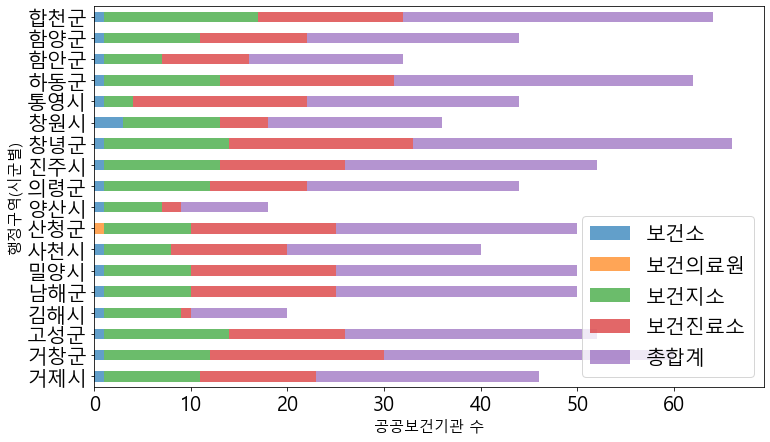

In [57]:

plt.rc('font', size=20)


공공보건.plot(kind='barh', figsize=(12,7), stacked=True, alpha=0.7)
plt.xlabel('공공보건기관 수', size=15)
plt.ylabel('행정구역(시군별)', size=15)

In [58]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
공공보건 = 공공보건.sort_index(ascending=False)

In [60]:
공공보건.columns

Index(['보건소', '보건의료원', '보건지소', '보건진료소', '총합계'], dtype='object')

In [61]:
공공보건 = 공공보건.T
공공보건

합천군 함양군 함안군 하동군 통영시 창원시 창녕군 진주시 의령군 양산시 산청군 사천시 밀양시 남해군 김해시 고성군 거창군 거제시
보건소     1   1   1   1   1   3   1   1   1   1   0   1   1   1   1   1   1   1
보건의료원   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
보건지소   16  10   6  12   3  10  13  12  11   6   9   7   9   9   8  13  11  10
보건진료소  15  11   9  18  18   5  19  13  10   2  15  12  15  15   1  12  18  12
총합계    32  22  16  31  22  18  33  26  22   9  25  20  25  25  10  26  30  23

In [62]:
경남_시군 = ['창원시','진주시','통영시','사천시','김해시','밀양시','거제시','양산시','의령군','함안군','창녕군','고성군','남해군','하동군','산청군','함양군','거창군','합천군']
경남_시군.reverse()

In [63]:
경남_시군

['합천군',
 '거창군',
 '함양군',
 '산청군',
 '하동군',
 '남해군',
 '고성군',
 '창녕군',
 '함안군',
 '의령군',
 '양산시',
 '거제시',
 '밀양시',
 '김해시',
 '사천시',
 '통영시',
 '진주시',
 '창원시']

In [64]:
공공보건 = 공공보건[경남_시군]

In [65]:
공공보건 = 공공보건.T
공공보건

보건소 보건의료원 보건지소 보건진료소 총합계
합천군   1     0   16    15  32
거창군   1     0   11    18  30
함양군   1     0   10    11  22
산청군   0     1    9    15  25
하동군   1     0   12    18  31
남해군   1     0    9    15  25
고성군   1     0   13    12  26
창녕군   1     0   13    19  33
함안군   1     0    6     9  16
의령군   1     0   11    10  22
양산시   1     0    6     2   9
거제시   1     0   10    12  23
밀양시   1     0    9    15  25
김해시   1     0    8     1  10
사천시   1     0    7    12  20
통영시   1     0    3    18  22
진주시   1     0   12    13  26
창원시   3     0   10     5  18

In [66]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = 공공보건['보건소']
y = 공공보건['보건의료원']
z = 공공보건['보건지소']
a = 공공보건['보건진료소']

data = [x, y, z, a]
y_array = 공공보건.index

for i in range(0, 4):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        alpha=0.55)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = 공공보건['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('공공보건기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(공공보건.columns, loc = (0.83, 0.5) )
plt.show()

 # 공공의료기관


In [67]:
공공의료 = pd.read_csv('./전처리/별첨/경남공공의료기관_2.csv', encoding='cp949')

In [68]:
공공의료

Unnamed: 0                                            암호화요양기호  \
0            0  JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...   
1            1  JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...   
2            2  JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...   
3            3  JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...   
4            4  JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...   
5            5  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkMzgxMzUxIzExIyQxIy...   
6            6  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkMzgxMzUxIzExIyQxIy...   
7            7  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkMzgxMzUxIzExIyQxIy...   
8            8  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxOTYxIzExIyQxIy...   
9            9  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkMzgxMzUxIzExIyQxIy...   
10          10  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkMzgxMzUxIzExIyQxIy...   
11          11  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQxIy...   
12          12  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQyIy...   
13          13  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQyIy...   
14          14  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQyIy...   
15          15  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQxIy...   
16          16  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzExIyQxIy...   
17          17  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...   
18          18  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...   
19          19  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...   
20          20  JDQ4MTYyMiM4MSMkMSMkNCMkNjIkMzgxMzUxIzExIyQxIy...   
21          21  JDQ4MTYyMiM4MSMkMSMkNCMkMTMkMzgxMTkxIzExIyQxIy...   

                         요양기관명  종별코드 종별코드명    시도코드 시도코드명   시군구코드   시군구코드명  \
0                    경상남도마산의료원    11  종합병원  380000    경남  380702  창원마산합포구   
1                    경상국립대학교병원     1  상급종합  380000    경남  380500      진주시   
2                    양산부산대학교병원     1  상급종합  380000    경남  381100      양산시   
3                  근로복지공단 창원병원    11  종합병원  380000    경남  380705    창원성산구   
4                  창원경상국립대학교병원    11  종합병원  380000    경남  380705    창원성산구   
5                       국립마산병원    21    병원  380000    경남  380702  창원마산합포구   
6                      통영적십자병원    21    병원  380000    경남  380800      통영시   
7                      거창적십자병원    21    병원  380000    경남  380002      거창군   
8                       국립부곡병원    29  정신병원  380000    경남  380014      창녕군   
9             의료법인 순영의료재단 순영병원    29  정신병원  380000    경남  380300      사천시   
10                     해군해양의료원    21    병원  380000    경남  380703    창원진해구   
11                    시립창원요양병원    28  요양병원  380000    경남  380704    창원의창구   
12     (의)환명의료재단 경상남도립김해노인전문병원    28  요양병원  380000    경남  380100      김해시   
13               경상남도립양산노인전문병원    28  요양병원  380000    경남  381100      양산시   
14                 거창군립 노인요양병원    28  요양병원  380000    경남  380002      거창군   
15  의료법인 진주의료재단 경상남도립 통영노인전문병원    28  요양병원  380000    경남  380800      통영시   
16                  남해군립노인전문병원    28  요양병원  380000    경남  380005      남해군   
17   의료법인 행복한의료재단 경남도립사천노인전문병원    28  요양병원  380000    경남  380300      사천시   
18                  의령군립노인전문병원    28  요양병원  380000    경남  380011      의령군   
19                    시립마산요양병원    28  요양병원  380000    경남  380702  창원마산합포구   
20                 양산부산대학교치과병원    41  치과병원  380000    경남  381100      양산시   
21                   부산대학교한방병원    92  한방병원  380000    경남  381100      양산시   

    읍면동  ...  치과일반의 인원수 치과인턴 인원수 치과레지던트 인원수 치과전문의 인원수 한방일반의 인원수  한방인턴 인원수  \
0   NaN  ...          0        0          0         0         0         0   
1   NaN  ...          1        0          0         1         0         0   
2   NaN  ...          1        0          0         1         0         0   
3   NaN  ...          4        0          0         0         0         0   
4   NaN  ...          0        0          0         3         0         0   
5   NaN  ...          0        0          0         0         0         0   
6   NaN  ...          0        0          0         0         0         0   
7   NaN  ...          0     

In [69]:
공공의료 = 공공의료[['종별코드명','시군구코드명']]

In [70]:
공공의료

종별코드명   시군구코드명
0   종합병원  창원마산합포구
1   상급종합      진주시
2   상급종합      양산시
3   종합병원    창원성산구
4   종합병원    창원성산구
5     병원  창원마산합포구
6     병원      통영시
7     병원      거창군
8   정신병원      창녕군
9   정신병원      사천시
10    병원    창원진해구
11  요양병원    창원의창구
12  요양병원      김해시
13  요양병원      양산시
14  요양병원      거창군
15  요양병원      통영시
16  요양병원      남해군
17  요양병원      사천시
18  요양병원      의령군
19  요양병원  창원마산합포구
20  치과병원      양산시
21  한방병원      양산시

In [71]:
for n in range(len(공공의료)):
    if ((공공의료['시군구코드명'][n] == '창원마산합포구') or        
       (공공의료['시군구코드명'][n] == '창원의창구') or
        (공공의료['시군구코드명'][n] == '창원마산회원구') or
        (공공의료['시군구코드명'][n] == '창원진해구') or
        (공공의료['시군구코드명'][n] == '창원성산구')):
            공공의료['시군구코드명'][n] = '창원시'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\3046887039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  공공의료['시군구코드명'][n] = '창원시'


In [72]:
공공의료

종별코드명 시군구코드명
0   종합병원    창원시
1   상급종합    진주시
2   상급종합    양산시
3   종합병원    창원시
4   종합병원    창원시
5     병원    창원시
6     병원    통영시
7     병원    거창군
8   정신병원    창녕군
9   정신병원    사천시
10    병원    창원시
11  요양병원    창원시
12  요양병원    김해시
13  요양병원    양산시
14  요양병원    거창군
15  요양병원    통영시
16  요양병원    남해군
17  요양병원    사천시
18  요양병원    의령군
19  요양병원    창원시
20  치과병원    양산시
21  한방병원    양산시

In [73]:
의료_요약 = 공공의료.groupby('시군구코드명').value_counts('종별코드명')

ValueError: Keys {'별', '명', '종', '드', '코'} in subset do not exist in the DataFrame.

In [ ]:
의료_요약

In [ ]:
의료_요약 = pd.DataFrame(의료_요약)

In [ ]:
의료_요약

In [ ]:
#의료_요약.to_csv('./전처리/경남공공의료기관.csv',encoding='cp949')

In [74]:
공공의료 = pd.read_csv('./전처리/경남공공의료기관.csv',encoding='cp949', index_col=['행 레이블'])

In [75]:
공공의료

병원  상급종합  전문병원  종합병원  총합계
행 레이블                           
거창군     1     0     1     0    2
김해시     0     0     1     0    1
남해군     0     0     1     0    1
사천시     0     0     2     0    2
양산시     0     1     3     0    4
의령군     0     0     1     0    1
진주시     0     1     0     0    1
창녕군     0     0     1     0    1
창원시     2     0     2     3    7
통영시     1     0     1     0    2
총합계     4     2    13     3   22

In [76]:
공공의료.drop('총합계', axis=0, inplace=True)

In [77]:
공공의료

병원  상급종합  전문병원  종합병원  총합계
행 레이블                           
거창군     1     0     1     0    2
김해시     0     0     1     0    1
남해군     0     0     1     0    1
사천시     0     0     2     0    2
양산시     0     1     3     0    4
의령군     0     0     1     0    1
진주시     0     1     0     0    1
창녕군     0     0     1     0    1
창원시     2     0     2     3    7
통영시     1     0     1     0    2

In [78]:
공공의료.columns

Index(['병원', '상급종합', '전문병원', '종합병원', '총합계'], dtype='object')

In [79]:
공공의료 = 공공의료[['전문병원', '병원', '종합병원','상급종합', '총합계']]

In [80]:
공공의료.sort_index(ascending=False,inplace=True)

In [81]:
공공의료 = 공공의료.T
공공의료

행 레이블  통영시  창원시  창녕군  진주시  의령군  양산시  사천시  남해군  김해시  거창군
전문병원     1    2    1    0    1    3    2    1    1    1
병원       1    2    0    0    0    0    0    0    0    1
종합병원     0    3    0    0    0    0    0    0    0    0
상급종합     0    0    0    1    0    1    0    0    0    0
총합계      2    7    1    1    1    4    2    1    1    2

In [82]:
공공의료 = 공공의료[['거창군','남해군','창녕군','의령군','양산시','김해시','사천시','통영시','진주시','창원시']]

In [83]:
공공의료 = 공공의료.T
공공의료

전문병원  병원  종합병원  상급종합  총합계
행 레이블                           
거창군       1   1     0     0    2
남해군       1   0     0     0    1
창녕군       1   0     0     0    1
의령군       1   0     0     0    1
양산시       3   0     0     1    4
김해시       1   0     0     0    1
사천시       2   0     0     0    2
통영시       1   1     0     0    2
진주시       0   0     0     1    1
창원시       2   2     3     0    7

In [84]:
f, ax = plt.subplots(figsize=(14, 4), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = 공공의료['상급종합']
y = 공공의료['종합병원']
z = 공공의료['병원']
a = 공공의료['전문병원']



data = [a,z,y,x]
y_array = 공공의료.index
color = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']

for i in range(0, 4):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        color=color[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        alpha=0.55)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = 공공의료['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('공공의료기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(공공의료.columns, loc = (0.83, 0.5) )
plt.xlim(0,10)
plt.show()

# 민간의료기관

In [85]:
민간 = pd.read_csv('./전처리/별첨/경남민간병원.csv', encoding='cp949')

In [86]:
민간

Unnamed: 0                                            암호화요양기호  \
0              0  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzExIyQxIy...   
1              1  JDQ4MTYyMiM4MSMkMSMkNCMkOTkkNTgxMzUxIzIxIyQxIy...   
2              2  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzIxIyQxIy...   
3              3  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...   
4              4  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxOTYxIzIxIyQxIy...   
...          ...                                                ...   
3755        3755  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxOTYxIzIxIyQxIy...   
3756        3756  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkMzgxNzAyIzMxIyQxIy...   
3757        3757  JDQ4MTYyMiM4MSMkMSMkNCMkMTMkMzgxNzAyIzExIyQxIy...   
3758        3758  JDQ4MTYyMiM4MSMkMiMkNCMkMDAkNDgxMzUxIzMxIyQxIy...   
3759        3759  JDQ4MTYyMiM4MSMkMSMkNCMkNzIkMzgxMzUxIzIxIyQxIy...   

            요양기관명  종별코드 종별코드명    시도코드 시도코드명   시군구코드 시군구코드명  읍면동  ...  \
0          거제아동의원    31    의원  380000    경남  381000    거제시  NaN  ...   
1          거제요양병원    28  요양병원  380000    경남  381000    거제시  NaN  ...   
2     대우조선해양 부속의원    31    의원  380000    경남  381000    거제시  NaN  ...   
3          대우치과의원    51  치과의원  380000    경남  381000    거제시  아주동  ...   
4     연세마취통증의학과의원    31    의원  380000    경남  381000    거제시  NaN  ...   
...           ...   ...   ...     ...   ...     ...    ...  ...  ...   
3755     단아미소치과의원    51  치과의원  380000    경남  380019    합천군  합천읍  ...   
3756      이홍석내과의원    31    의원  380000    경남  380019    합천군  합천읍  ...   
3757       허승무한의원    93   한의원  380000    경남  380019    합천군  합천읍  ...   
3758         해인의원    31    의원  380000    경남  380019    합천군  NaN  ...   
3759      안동환치과의원    51  치과의원  380000    경남  380019    합천군  합천읍  ...   

      치과일반의 인원수 치과인턴 인원수 치과레지던트 인원수 치과전문의 인원수  한방일반의 인원수  한방인턴 인원수  \
0             0        0          0         0          0         0   
1             0        0          0         0          1         0   
2             0        0          0         0          0         0   
3             1        0          0         0          0         0   
4             0        0          0         0          0         0   
...         ...      ...        ...       ...        ...       ...   
3755          1        0          0         0          0         0   
3756          0        0          0         0          0         0   
3757          0        0          0         0          1         0   
3758          0        0          0         0          0         0   
3759          1        0          0         0          0         0   

      한방레지던트 인원수  한방전문의 인원수         x좌표        y좌표  
0              0          0  128.622106  34.889810  
1              0          0  128.718479  34.859862  
2              0          0  128.725318  34.881670  
3              0          0  128.693260  34.867402  
4              0          0  128.693260  34.867402  
...          ...        ...         ...        ...  
3755           0          0  128.164970  35.568303  
3756           0          0  128.165093  35.567904  
3757           0          0  128.160881  35.567394  
3758           0          0  128.162979  35.568647  
3759           0          0  128.162339  35.563906  

[3760 rows x 29 columns]

In [87]:
민간 = 민간[['시군구코드명','종별코드명']]

In [88]:
민간

시군구코드명 종별코드명
0       거제시    의원
1       거제시  요양병원
2       거제시    의원
3       거제시  치과의원
4       거제시    의원
...     ...   ...
3755    합천군  치과의원
3756    합천군    의원
3757    합천군   한의원
3758    합천군    의원
3759    합천군  치과의원

[3760 rows x 2 columns]

In [89]:
for n in tqdm(range(len(민간))):
    if '의원' in 민간['종별코드명'][n] or 민간['종별코드명'][n] == '조산원':
        민간['종별코드명'][n] = '의원급'
    

  0%|                                                                                         | 0/3760 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\651892999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  민간['종별코드명'][n] = '의원급'
100%|████████████████████████████████████████████████████████████████████████████| 3760/3760 [00:00<00:00, 9591.25it/s]


In [90]:
민간.value_counts('종별코드명')

종별코드명
의원급     3430
병원       128
요양병원     118
정신병원      26
종합병원      20
치과병원      19
한방병원      18
상급종합       1
dtype: int64

In [91]:
for n in tqdm(range(len(민간))):
    if 민간['종별코드명'][n] == '종합병원':
        민간['종별코드명'][n] = '종합병원급'
    elif '병원' in 민간['종별코드명'][n]:
        민간['종별코드명'][n] = '병원급'
    elif 민간['종별코드명'][n] == '상급종합':
        민간['종별코드명'][n] = '상급종합병원급'

  0%|                                                                                         | 0/3760 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2753903562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  민간['종별코드명'][n] = '병원급'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2753903562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  민간['종별코드명'][n] = '종합병원급'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2753903562.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [92]:
for n in range(len(민간)):
    if ((민간['시군구코드명'][n] == '창원마산합포구') or        
       (민간['시군구코드명'][n] == '창원의창구') or
        (민간['시군구코드명'][n] == '창원마산회원구') or
        (민간['시군구코드명'][n] == '창원진해구') or
        (민간['시군구코드명'][n] == '창원성산구')):
            민간['시군구코드명'][n] = '창원시'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2125891422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  민간['시군구코드명'][n] = '창원시'


In [93]:
민간_s = 민간.groupby('시군구코드명').value_counts('종별코드명')

ValueError: Keys {'별', '명', '종', '드', '코'} in subset do not exist in the DataFrame.

In [94]:
민간 = pd.DataFrame(민간_s)

NameError: name '민간_s' is not defined

In [95]:
민간

시군구코드명 종별코드명
0       거제시   의원급
1       거제시   병원급
2       거제시   의원급
3       거제시   의원급
4       거제시   의원급
...     ...   ...
3755    합천군   의원급
3756    합천군   의원급
3757    합천군   의원급
3758    합천군   의원급
3759    합천군   의원급

[3760 rows x 2 columns]

In [96]:
#민간.to_csv('./전처리/경남민간기관.csv',encoding='cp949')

In [97]:
민간 = pd.read_csv('./전처리/경남민간기관.csv',encoding='cp949', index_col=['행 레이블'])

In [98]:
민간

병원급  상급종합병원급   의원급  종합병원급   총합계
행 레이블                                 
거제시     12        0   198      3   213
거창군      4        0    61      0    65
고성군      5        0    41      0    46
김해시     65        0   483      5   553
남해군      1        0    43      0    44
밀양시     14        0    96      0   110
사천시     10        0   113      0   123
산청군      1        0    34      0    35
양산시     32        0   353      2   387
의령군      3        0    21      0    24
진주시     28        0   422      3   453
창녕군     10        0    56      0    66
창원시     99        1  1201      6  1307
통영시      9        0   133      1   143
하동군      3        0    41      0    44
함안군      7        0    51      0    58
함양군      1        0    42      0    43
합천군      5        0    41      0    46

In [99]:
민간['병원급']['김해시'] = 64
민간['총합계']['김해시'] = 552

In [100]:
민간.sort_index(ascending=False,inplace=True)

In [101]:
민간

병원급  상급종합병원급   의원급  종합병원급   총합계
행 레이블                                 
합천군      5        0    41      0    46
함양군      1        0    42      0    43
함안군      7        0    51      0    58
하동군      3        0    41      0    44
통영시      9        0   133      1   143
창원시     99        1  1201      6  1307
창녕군     10        0    56      0    66
진주시     28        0   422      3   453
의령군      3        0    21      0    24
양산시     32        0   353      2   387
산청군      1        0    34      0    35
사천시     10        0   113      0   123
밀양시     14        0    96      0   110
남해군      1        0    43      0    44
김해시     64        0   483      5   552
고성군      5        0    41      0    46
거창군      4        0    61      0    65
거제시     12        0   198      3   213

In [102]:
민간 = 민간.T
민간

행 레이블    합천군  함양군  함안군  하동군  통영시   창원시  창녕군  진주시  의령군  양산시  산청군  사천시  밀양시  \
병원급        5    1    7    3    9    99   10   28    3   32    1   10   14   
상급종합병원급    0    0    0    0    0     1    0    0    0    0    0    0    0   
의원급       41   42   51   41  133  1201   56  422   21  353   34  113   96   
종합병원급      0    0    0    0    1     6    0    3    0    2    0    0    0   
총합계       46   43   58   44  143  1307   66  453   24  387   35  123  110   

행 레이블    남해군  김해시  고성군  거창군  거제시  
병원급        1   64    5    4   12  
상급종합병원급    0    0    0    0    0  
의원급       43  483   41   61  198  
종합병원급      0    5    0    0    3  
총합계       44  552   46   65  213

In [103]:
경남_시군 = ['창원시','진주시','통영시','사천시','김해시','밀양시','거제시','양산시','의령군','함안군','창녕군','고성군','남해군','하동군','산청군','함양군','거창군','합천군']
경남_시군.reverse()

In [104]:
민간 = 민간[경남_시군]
민간

행 레이블    합천군  거창군  함양군  산청군  하동군  남해군  고성군  창녕군  함안군  의령군  양산시  거제시  밀양시  김해시  \
병원급        5    4    1    1    3    1    5   10    7    3   32   12   14   64   
상급종합병원급    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
의원급       41   61   42   34   41   43   41   56   51   21  353  198   96  483   
종합병원급      0    0    0    0    0    0    0    0    0    0    2    3    0    5   
총합계       46   65   43   35   44   44   46   66   58   24  387  213  110  552   

행 레이블    사천시  통영시  진주시   창원시  
병원급       10    9   28    99  
상급종합병원급    0    0    0     1  
의원급      113  133  422  1201  
종합병원급      0    1    3     6  
총합계      123  143  453  1307

In [105]:
민간 = 민간.T
민간

병원급  상급종합병원급   의원급  종합병원급   총합계
행 레이블                                 
합천군      5        0    41      0    46
거창군      4        0    61      0    65
함양군      1        0    42      0    43
산청군      1        0    34      0    35
하동군      3        0    41      0    44
남해군      1        0    43      0    44
고성군      5        0    41      0    46
창녕군     10        0    56      0    66
함안군      7        0    51      0    58
의령군      3        0    21      0    24
양산시     32        0   353      2   387
거제시     12        0   198      3   213
밀양시     14        0    96      0   110
김해시     64        0   483      5   552
사천시     10        0   113      0   123
통영시      9        0   133      1   143
진주시     28        0   422      3   453
창원시     99        1  1201      6  1307

In [106]:
민간 = 민간[['의원급', '병원급', '종합병원급','상급종합병원급', '총합계']]

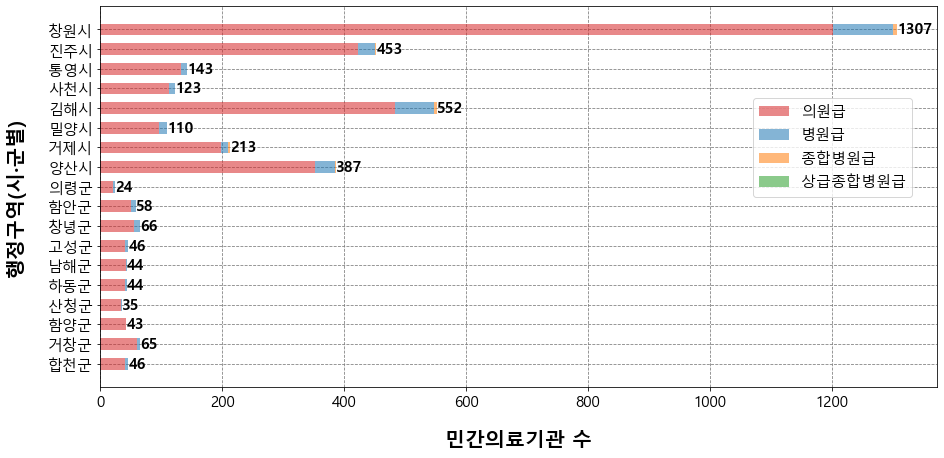

In [107]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = 민간['상급종합병원급']
y = 민간['종합병원급']
z = 민간['병원급']
a = 민간['의원급']



data = [a,z,y,x]
y_array = 민간.index
color = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']

for i in range(0, 4):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        color=color[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        alpha=0.55)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = 민간['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+0.2, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')
    
    
    
plt.xlabel('민간의료기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(민간.columns, loc = (0.78, 0.5) )
# plt.xlim(0,10)
plt.show()

In [108]:
년도 = {2006: 400,
 2007: 424,
 2008: 432,
 2009: 458,
 2010: 464,
 2011: 468,
 2012: 481,
 2013: 493,
 2014: 504,
 2015: 503,
 2016: 519,
 2017: 530,
 2018: 537,
 2019: 535,
 2020: 545,
 2021: 562,
 2022: 563}

In [109]:
년도_df = pd.Series(년도)

In [110]:
년도_df = pd.DataFrame(년도_df, columns=['민간'])

In [111]:
년도_df

민간
2006  400
2007  424
2008  432
2009  458
2010  464
2011  468
2012  481
2013  493
2014  504
2015  503
2016  519
2017  530
2018  537
2019  535
2020  545
2021  562
2022  563

In [112]:
년도_df['민간'] = 년도_df['민간'] - 11

In [113]:
년도_df

민간
2006  389
2007  413
2008  421
2009  447
2010  453
2011  457
2012  470
2013  482
2014  493
2015  492
2016  508
2017  519
2018  526
2019  524
2020  534
2021  551
2022  552

In [114]:
년도_df['공공'] = 8

In [115]:
년도_df['공공'][1:] = 9

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\3366885634.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  년도_df['공공'][1:] = 9


In [116]:
년도_df['공공'][3:] = 10

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\2065806899.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  년도_df['공공'][3:] = 10


In [117]:
년도_df['공공'][5:] = 11

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6416\1634958396.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  년도_df['공공'][5:] = 11


In [118]:
년도_df['총합계'] = 년도_df['민간'] + 년도_df['공공']

In [119]:
년도_df.reset_index(inplace=True)

In [120]:
년도_df

index   민간  공공  총합계
0    2006  389   8  397
1    2007  413   9  422
2    2008  421   9  430
3    2009  447  10  457
4    2010  453  10  463
5    2011  457  11  468
6    2012  470  11  481
7    2013  482  11  493
8    2014  493  11  504
9    2015  492  11  503
10   2016  508  11  519
11   2017  519  11  530
12   2018  526  11  537
13   2019  524  11  535
14   2020  534  11  545
15   2021  551  11  562
16   2022  552  11  563

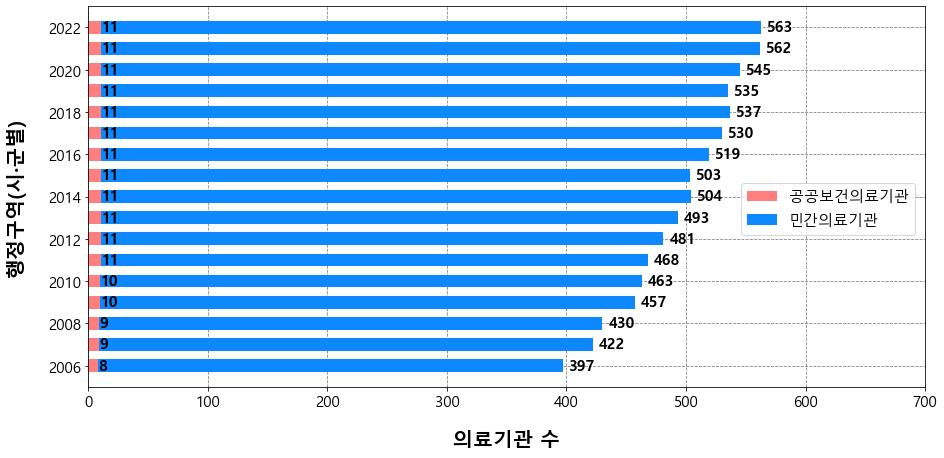

In [122]:
f, ax = plt.subplots(figsize=(15, 7), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

x = 년도_df['민간']
y = 년도_df['공공']



data = [y, x]
y_array = 년도_df['index']
color = ['#ff7f7f', '#0e88ff', '#2ca02c']

for i in range(0, 2):
    barh = plt.barh(
        y = y_array,
        width = data[i],
        color=color[i],
        height=0.6,
        left=np.sum(data[:i], axis=0),
        alpha=1)
    
    
for n in range(len(barh.patches)):
    p = barh.patches[n]
    w = 년도_df['총합계'][n]
    x, y, width, height = p.get_bbox().bounds
    ax.text(w+5, y+height/2, "%.0f" %(w), va='center', size = 15,fontweight = 'bold')

for n in range(len(barh.patches)):
        p = barh.patches[n]
        g = 년도_df['공공'][n]
        w = 년도_df['공공'][n]
        x, y, width, height = p.get_bbox().bounds
        ax.text(w+0.2, y+height/2, "%.0f" %(g), va='center', color='black', size = 15,fontweight = 'bold')    
    
    
plt.xlabel('의료기관 수', labelpad=20, size=20, weight ='bold')
plt.ylabel('행정구역(시·군별)', labelpad=20, size=20, weight ='bold')
plt.legend(['공공보건의료기관','민간의료기관'], loc = (0.78, 0.4) )
plt.xlim(0, 700)
plt.ylim(2005,2023)
plt.show()

# 행정동별 필수과목

In [144]:
import geopandas as gpd

D:\ANACONDA3\envs\py38-env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(


In [145]:
필수 = gpd.read_file('D:/김해시청 프로젝트/shp/생활의료과목.shp', encoding='cp949')

In [146]:
필수.columns

Index(['EMD_CD', 'EMD_NM', 'SGG_OID', 'COL_ADM_SE', 'GID', '면적', '피부과', '치과',
       '한방', 'geometry'],
      dtype='object')

In [147]:
필수 = 필수[[ 'EMD_NM', '피부과', '치과','한방']]

In [148]:
필수.set_index('EMD_NM', inplace=True)

In [149]:
필수 = 필수.T

In [150]:
행정동 = ['진영읍',
'주촌면',
'진례면',
'한림면',
'생림면',
'상동면',
'대동면',
'동상동',
'회현동',
'부원동',
'내외동',
'북부동',
'칠산서부동',
'활천동',
'삼안동',
'불암동',
'장유1동',
'장유2동',
'장유3동']


In [151]:
필수 = 필수[행정동].T

In [152]:
필수.astype({'피부과':int,'치과':int,'한방':int})

피부과  치과  한방
EMD_NM             
진영읍      18  15  13
주촌면       1   2   3
진례면       2   1   2
한림면       1   1   1
생림면       2   0   2
상동면       1   0   1
대동면       1   0   1
동상동       0   0   1
회현동       3   6   7
부원동       9   9  11
내외동      32  33  24
북부동      22  21  21
칠산서부동     1   0   2
활천동      12  10  15
삼안동       7   7   4
불암동       2   1   2
장유1동     18  12  10
장유2동     11   8  11
장유3동     20  19  12

# 경남 의료서비스 인식

In [153]:
인식 = pd.read_csv('./원본 DATA/의료시설의_의료서비스_만족도_및_불만이유_20221125135831.csv', encoding='cp949',header=1)

In [154]:
인식

특성별(1) 특성별(2)    소계    병원    의원  치과병·의원  한방병·의원  보건소  약국(한약국)  기타  ...  \
0     합계     소계  76.3  35.0  48.4     9.6     3.5  1.6      2.0   0  ...   
1     성별     남자  71.0  38.6  44.4    11.9     2.8  1.4      1.0   0  ...   
2     성별     여자  81.5  32.0  51.7     7.6     4.0  1.7      2.8   0  ...   

     보통    불만  의료시설이 멀다  의료비가 비싸다  전문 의료 인력이 부족하다  진료 및 입원대기 시간이 길다  \
0  45.2  23.2      15.0      23.0            10.0              33.9   
1  44.9  26.2      16.4      21.2            10.4              32.3   
2  45.4  20.7      13.6      25.0             9.7              35.5   

   치료결과가 미흡하다  의료시설이 낙후되고 불친절하다  한 번에 다양한 검사 및 치료가 어렵다  기타.1  
0         8.6               2.8                    5.8   0.8  
1         7.1               3.6                    7.3   1.6  
2        10.2               1.8                    4.2   0.0  

[3 rows x 21 columns]

In [155]:
인식.columns

Index(['특성별(1)', '특성별(2)', '소계', '병원', '의원', '치과병·의원', '한방병·의원', '보건소',
       '약국(한약국)', '기타', '만족', '보통', '불만', '의료시설이 멀다', '의료비가 비싸다',
       '전문 의료 인력이 부족하다', '진료 및 입원대기 시간이 길다', '치료결과가 미흡하다', '의료시설이 낙후되고 불친절하다',
       '한 번에 다양한 검사 및 치료가 어렵다', '기타.1'],
      dtype='object')

In [156]:
인식 = 인식[['소계', '병원', '의원', '치과병·의원', '한방병·의원', '보건소',
       '약국(한약국)', '기타', '만족', '보통', '불만', '의료시설이 멀다', '의료비가 비싸다',
       '전문 의료 인력이 부족하다', '진료 및 입원대기 시간이 길다', '치료결과가 미흡하다', '의료시설이 낙후되고 불친절하다',
       '한 번에 다양한 검사 및 치료가 어렵다', '기타.1']]

In [157]:
인식

소계    병원    의원  치과병·의원  한방병·의원  보건소  약국(한약국)  기타    만족    보통    불만  \
0  76.3  35.0  48.4     9.6     3.5  1.6      2.0   0  31.6  45.2  23.2   
1  71.0  38.6  44.4    11.9     2.8  1.4      1.0   0  28.9  44.9  26.2   
2  81.5  32.0  51.7     7.6     4.0  1.7      2.8   0  33.9  45.4  20.7   

   의료시설이 멀다  의료비가 비싸다  전문 의료 인력이 부족하다  진료 및 입원대기 시간이 길다  치료결과가 미흡하다  \
0      15.0      23.0            10.0              33.9         8.6   
1      16.4      21.2            10.4              32.3         7.1   
2      13.6      25.0             9.7              35.5        10.2   

   의료시설이 낙후되고 불친절하다  한 번에 다양한 검사 및 치료가 어렵다  기타.1  
0               2.8                    5.8   0.8  
1               3.6                    7.3   1.6  
2               1.8                    4.2   0.0

In [158]:
인식.loc[0][1:]

병원                       35.0
의원                       48.4
치과병·의원                    9.6
한방병·의원                    3.5
보건소                       1.6
약국(한약국)                   2.0
기타                        0.0
만족                       31.6
보통                       45.2
불만                       23.2
의료시설이 멀다                 15.0
의료비가 비싸다                 23.0
전문 의료 인력이 부족하다           10.0
진료 및 입원대기 시간이 길다         33.9
치료결과가 미흡하다                8.6
의료시설이 낙후되고 불친절하다          2.8
한 번에 다양한 검사 및 치료가 어렵다     5.8
기타.1                      0.8
Name: 0, dtype: float64

In [159]:
인식 = pd.DataFrame(인식.loc[0][1:])

In [160]:
인식

0
병원                     35.0
의원                     48.4
치과병·의원                  9.6
한방병·의원                  3.5
보건소                     1.6
약국(한약국)                 2.0
기타                      0.0
만족                     31.6
보통                     45.2
불만                     23.2
의료시설이 멀다               15.0
의료비가 비싸다               23.0
전문 의료 인력이 부족하다         10.0
진료 및 입원대기 시간이 길다       33.9
치료결과가 미흡하다              8.6
의료시설이 낙후되고 불친절하다        2.8
한 번에 다양한 검사 및 치료가 어렵다   5.8
기타.1                    0.8

In [161]:
list(인식.index[7:10])

['만족', '보통', '불만']

In [162]:
인식[0][7:10]

만족    31.6
보통    45.2
불만    23.2
Name: 0, dtype: float64

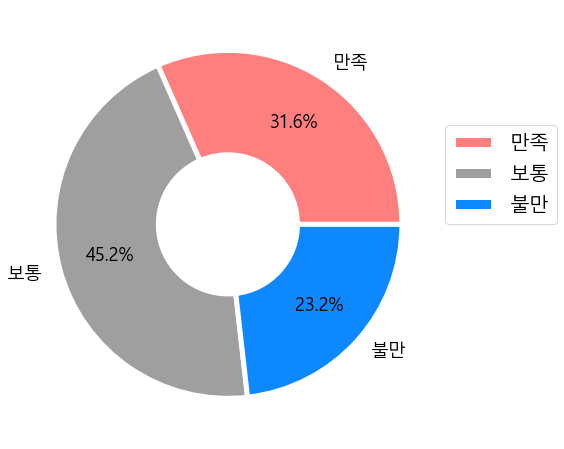

In [163]:
def customPct(pct) :
    return ('%.1f%%' % pct) if pct >= 3 else ''


f, ax = plt.subplots(figsize=(20, 8), facecolor='w')
plt.rc('font', size=20)
#plt.title('2020년 경상남도 의료서비스 불만사항', size = 25)
wedgeprops = {'width': 0.6, 'linewidth': 5, 'edgecolor': 'w'}
plt.pie(list(인식[0][7:10]), 
        labels = list(인식.index[7:10]), 
        autopct=customPct,
        explode=[0, 0, 0],
        wedgeprops = wedgeprops, 
        pctdistance=0.7,
        textprops={'size': 18},
        colors = ['#ff7f7f', '#9f9f9f', '#0e88ff'])
plt.legend(loc = (1, 0.5))
plt.show()

In [97]:
k, score = 3, [10, 100, 20, 150, 1, 100, 200]

a = []
out = []
for n in score:
    a.append(n)
    a.sort(reverse = True)
    if len(a) > k:
        out.append(a[k-1])
    elif len(a) <= k:
        out.append(a[-1])
    a.sort(reverse = True)
    print(a)

[10]
[100, 10]
[100, 20, 10]
[150, 100, 20, 10]
[150, 100, 20, 10, 1]
[150, 100, 100, 20, 10, 1]
[200, 150, 100, 100, 20, 10, 1]


In [98]:
[10, 10, 10, 20, 20, 100, 100]

[10, 10, 10, 20, 20, 100, 100]

In [99]:
a

[200, 150, 100, 100, 20, 10, 1]

In [100]:
out

[10, 10, 10, 20, 20, 100, 100]

In [5]:
y, z, a, x = [5], [65], [483], [11]

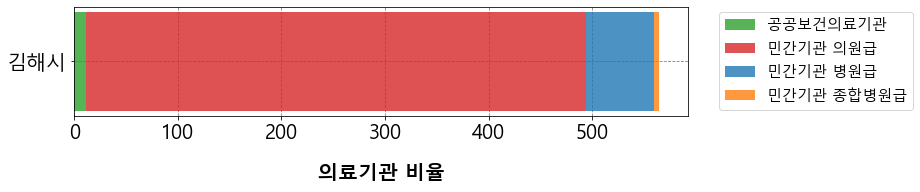

In [101]:
f, ax = plt.subplots(figsize=(11, 2), facecolor='w')
plt.rc('font', size=15)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

y, z, a, x = [5], [65], [483], [11]

data = [x,a,z,y]
y_array = 공공의료.index[5]
color = ['#2ca02c','#d62728', '#1f77b4', '#ff7f0e']

for i in range(0, 4):
    barh = plt.barh( y = y_array, width = data[i],
                     color=color[i], height=0.6,
                     left=np.sum(data[:i], axis=0),
                     alpha=0.8)

plt.xlabel('의료기관 비율', labelpad=20, size=20, weight ='bold')
plt.legend(['공공보건의료기관','민간기관 의원급', '민간기관 병원급', '민간기관 종합병원급'], loc = (1.05, 0.05) )
plt.show()